# Ex1C : Data Preprocessing

In [79]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset 1 :
Link : https://www.kaggle.com/datasets/manishkumar7432698/airline-passangers-booking-data?select=Passanger_booking_data.csv

In [80]:
flightsdf = pd.read_csv("Passanger_booking_data.csv")
flightsdf.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


**About Dataset**

This dataset provides comprehensive information about customers' preferences and behaviors related to airline holiday bookings. With detailed attributes covering various aspects of the booking process, this dataset is ideal for analyzing and understanding customer choices and patterns in the airline industry.

Potential analyses and applications include:

  * Identifying factors influencing successful holiday bookings and improving conversion rates.
  * Evaluating the impact of different services (e.g., in-flight meals, extra baggage allowance) on customers' booking decisions.
  * Assessing the relationship between booking lead time and customer choices.
  * Analyzing the popularity of various routes and flight schedules.
  * Investigating the influence of booking channels on customer behavior.
  * Predicting the likelihood of a successful holiday booking based on customer characteristics.
  * With its comprehensive range of attributes, this dataset presents an excellent opportunity for data scientists, researchers, and analysts to gain insights into customer behavior within the airline industry.

In [81]:
flightsdf.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [82]:
flightsdf.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [83]:
flightsdf.shape

(50002, 14)

In [84]:
flightsdf.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [85]:
flightsdf.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [86]:
#No need features : wants_extra_baggage, wants_preferred_seat and wants_in_flight_meals
flightsdf.drop(['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals'], axis=1, inplace=True)
flightsdf.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'flight_duration', 'booking_complete'],
      dtype='object')

In [87]:
flightsdf[flightsdf.duplicated()]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete
198,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,8.83,0
318,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,8.83,0
386,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,8.83,0
458,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,8.83,1
515,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...
49854,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,4.67,0
49904,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,4.67,0
49936,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,4.67,0
49946,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,4.67,0


In [88]:
flightsdf["trip_type"].value_counts()

RoundTrip     49498
OneWay          387
CircleTrip      117
Name: trip_type, dtype: int64

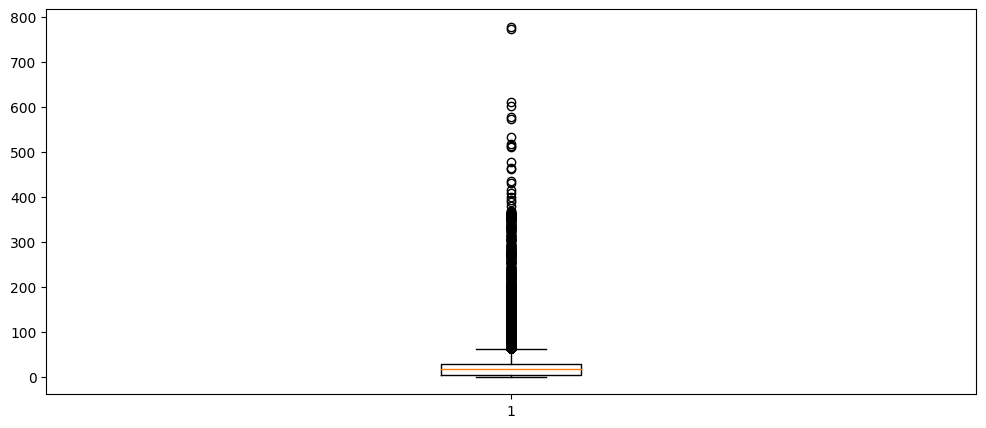

In [89]:
plt.figure(figsize=(12,5))
plt.boxplot(flightsdf["length_of_stay"])
plt.show()

In [90]:
flightsdf["route"].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
DELKBR       1
LBUTPE       1
KOSSYD       1
OOLWUH       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [91]:
flightsdf.columns = [col.lower().replace(" ","_") for col in flightsdf.columns]
df_temp = flightsdf
col_names = list(df_temp)
arr = []
for col in flightsdf.columns :
    arr.append( [col, df_temp[col].nunique(), df_temp[col].unique()])
descr1 = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],data=arr)
descr1

,Column Name,Number of Unique,Unique Sample
0,num_passengers,9,"[1, 2, 3, 4, 6, 5, 7, 9, 8]"
1,sales_channel,2,"[Internet, Mobile]"
2,trip_type,3,"[RoundTrip, CircleTrip, OneWay]"
3,purchase_lead,470,"[21, 262, 112, 243, 96, 68, 3, 201, 238, 80, 3..."
4,length_of_stay,336,"[12, 19, 20, 22, 31, 48, 33, 30, 25, 43, 24, 1..."
5,flight_hour,24,"[6, 7, 3, 17, 4, 15, 20, 14, 12, 2, 19, 10, 8,..."
6,flight_day,7,"[Tue, Sat, Wed, Thu, Mon, Sun, Fri]"
7,route,799,"[AKLHGH, AKLDEL, AKLHND, AKLICN, AKLKIX, AKLKT..."
8,booking_origin,104,"[Australia, New Zealand, India, United Kingdom..."
9,flight_duration,22,"[7.21, 5.52, 5.07, 7.57, 6.62, 7.0, 4.75, 8.83..."


<Axes: >

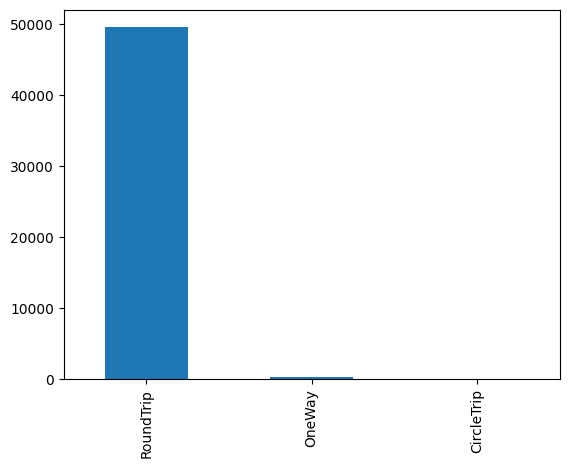

In [92]:
flightsdf['trip_type'].value_counts().plot.bar()

### Dataset 2
Link : https://www.kaggle.com/datasets/peshimaammuzammil/2023-bike-model-dataset-all-data-you-need

In [93]:
bikes = pd.read_csv("bikes_data.csv")
bikes.head()

,Company,Country of Origin,Model,Number of cc,Horsepower,Torque,Transmission Type,Drivetrain,Number of Seating,Price (in INR),Year,Looks,Body Type,Engine Type,Number of Cylinders
0,Aprilia,Italy,RS 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 10,99,000",2021,Sport,Naked,Parallel-twin,2
1,Aprilia,Italy,Tuono 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 11,99,000",2021,Sport,Naked,Parallel-twin,2
2,Aprilia,Italy,RS 125,124.9,15 hp,12 Nm,6-speed manual,Chain,2,"INR 4,49,000",2022,Sport,Racing,Single-cylinder,1
3,Aprilia,Italy,Shiver 900,896,95 hp,90 Nm,6-speed manual,Shaft,2,"INR 13,99,000",2022,Adventure,Naked,V-twin,2
4,Aprilia,Italy,Tuono 1100,1077,175 hp,121 Nm,6-speed manual,Shaft,2,"INR 19,99,000",2022,Adventure,Naked,V-twin,2


### About the dataset
This dataset can be used to analyze the performance, features, and pricing of different motorcycles. It can also be used to identify trends in the motorcycle industry.

* Company: The name of the motorcycle manufacturer.
* Country of Origin: The country where the motorcycle was manufactured.
* Model: The name of the motorcycle model.
* Number of cc: The displacement of the motorcycle's engine in cubic centimeters.
* Horsepower: The maximum power output of the motorcycle's engine in horsepower.
* Torque: The maximum torque output of the motorcycle's engine in Newton-meters.
* Transmission Type: The type of transmission used on the motorcycle, such as manual or automatic.
* Drivetrain: The type of drivetrain used on the motorcycle, such as front-wheel drive, rear-wheel
drive, or all-wheel drive.
* Number of Seating: The number of seats on the motorcycle.
* Price (in INR): The price of the motorcycle in Indian rupees.
* Looks: A subjective assessment of the motorcycle's appearance.
* Body Type: The type of bodywork on the motorcycle, such as a sportbike, cruiser, or enduro.
* Engine Type: The type of engine used on the motorcycle, such as petrol, diesel, or electric.
* Number of Cylinders: The number of cylinders in the motorcycle's engine.

Here are some of the ways that this dataset can be used:

To compare the performance of different motorcycles. This can be done by looking at the horsepower, torque, and other performance metrics.
To identify the best motorcycles for different purposes. For example, a sportbike might be a good choice for someone who wants a fast and agile motorcycle, while a cruiser might be a good choice for someone who wants a comfortable and stylish motorcycle.
To track the prices of motorcycles over time. This can be done by looking at the price of the same motorcycle model in different years.
To identify trends in the motorcycle industry. For example, the increasing popularity of electric motorcycles can be seen by looking at the number of electric motorcycles in the dataset over time.* Year: The year in which the motorcycle was manufactured.

In [94]:
bikes.columns

Index(['Company', 'Country of Origin', 'Model', 'Number of cc', 'Horsepower',
       'Torque', 'Transmission Type', 'Drivetrain', 'Number of Seating',
       'Price (in INR)', 'Year', 'Looks', 'Body Type', 'Engine Type',
       'Number of Cylinders'],
      dtype='object')

In [95]:
bikes.dtypes

Company                object
Country of Origin      object
Model                  object
Number of cc           object
Horsepower             object
Torque                 object
Transmission Type      object
Drivetrain             object
Number of Seating       int64
Price (in INR)         object
Year                    int64
Looks                  object
Body Type              object
Engine Type            object
Number of Cylinders    object
dtype: object

In [96]:
bikes.shape

(362, 15)

In [97]:
bikes.isnull().sum()

Company                0
Country of Origin      0
Model                  0
Number of cc           0
Horsepower             0
Torque                 0
Transmission Type      0
Drivetrain             0
Number of Seating      0
Price (in INR)         0
Year                   0
Looks                  0
Body Type              0
Engine Type            0
Number of Cylinders    1
dtype: int64

In [98]:
# Since there is only one NULL value the row can be dropped
bikes.dropna(inplace=True)

In [99]:
bikes.isnull().sum()

Company                0
Country of Origin      0
Model                  0
Number of cc           0
Horsepower             0
Torque                 0
Transmission Type      0
Drivetrain             0
Number of Seating      0
Price (in INR)         0
Year                   0
Looks                  0
Body Type              0
Engine Type            0
Number of Cylinders    0
dtype: int64

In [100]:
def unique_values_in_df(df) :
  df.columns = [col.lower().replace(" ","_") for col in df.columns]
  df_temp = df
  col_names = list(df_temp)
  arr = []
  for col in df.columns :
      arr.append( [col, df_temp[col].nunique(), df_temp[col].unique()])
  descr1 = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],data=arr)
  return descr1

display(unique_values_in_df(bikes))

,Column Name,Number of Unique,Unique Sample
0,company,75,"[Aprilia, Benelli, BMW, Brixton Motorcycles, B..."
1,country_of_origin,17,"[Italy, Germany, Austria, United States, Unite..."
2,model,344,"[RS 660, Tuono 660, RS 125, Shiver 900, Tuono ..."
3,number_of_cc,138,"[659, 124.9, 896, 1077, 125, 250, 300, 600, 89..."
4,horsepower,245,"[100 hp, 15 hp, 95 hp, 175 hp, 11 hp, 27 hp, 3..."
5,torque,218,"[67 Nm, 12 Nm, 90 Nm, 121 Nm, 10.8 Nm, 21.2 Nm..."
6,transmission_type,32,"[6-speed quickshifter, 6-speed manual, Manual,..."
7,drivetrain,21,"[Chain, Shaft, Belt, Chain drive, Shaft drive,..."
8,number_of_seating,3,"[2, 1, 3]"
9,price_(in_inr),291,"[INR 10,99,000, INR 11,99,000, INR 4,49,000, I..."


In [101]:
bikes.describe()

,number_of_seating,year
count,361.000000,361.000000
mean,1.620499,2021.623269
std,0.491620,3.696381
min,1.000000,1994.000000
25%,1.000000,2022.000000
50%,2.000000,2023.000000
75%,2.000000,2023.000000
max,3.000000,2023.000000


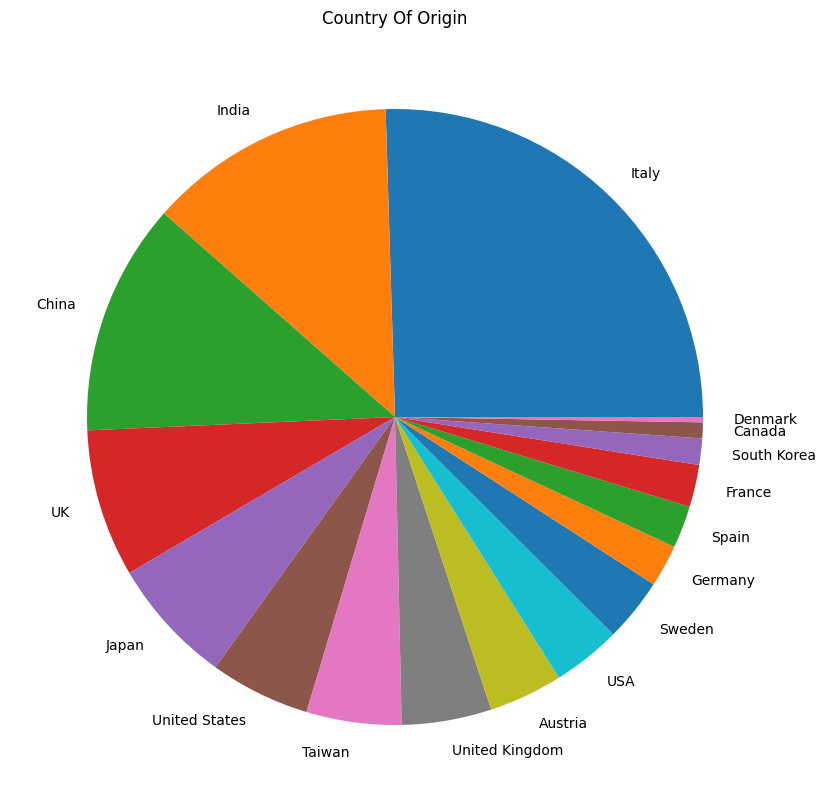

In [102]:
countrydict = dict(bikes["country_of_origin"].value_counts())
plt.figure(figsize=(20,10))
plt.pie(countrydict.values(), labels=countrydict.keys())
plt.title("Country Of Origin")
plt.show()

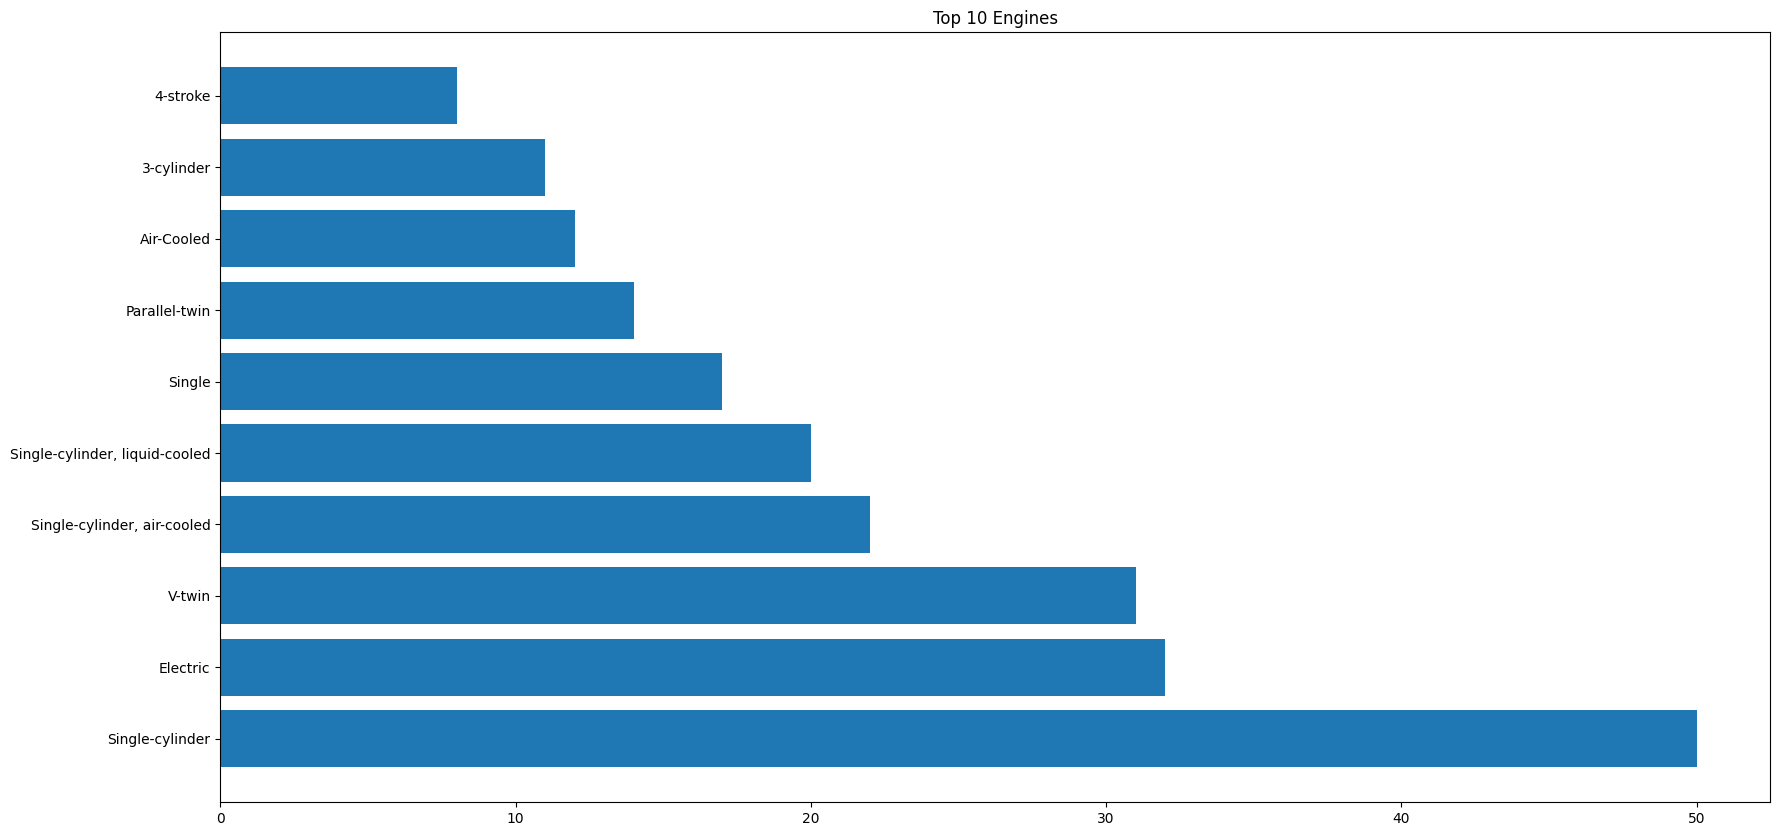

In [103]:
topEngines = dict(bikes["engine_type"].value_counts().sort_values(ascending=False)[:10])
plt.figure(figsize=(20, 10))
plt.barh(list(topEngines.keys()), topEngines.values())
plt.title("Top 10 Engines")
plt.show()

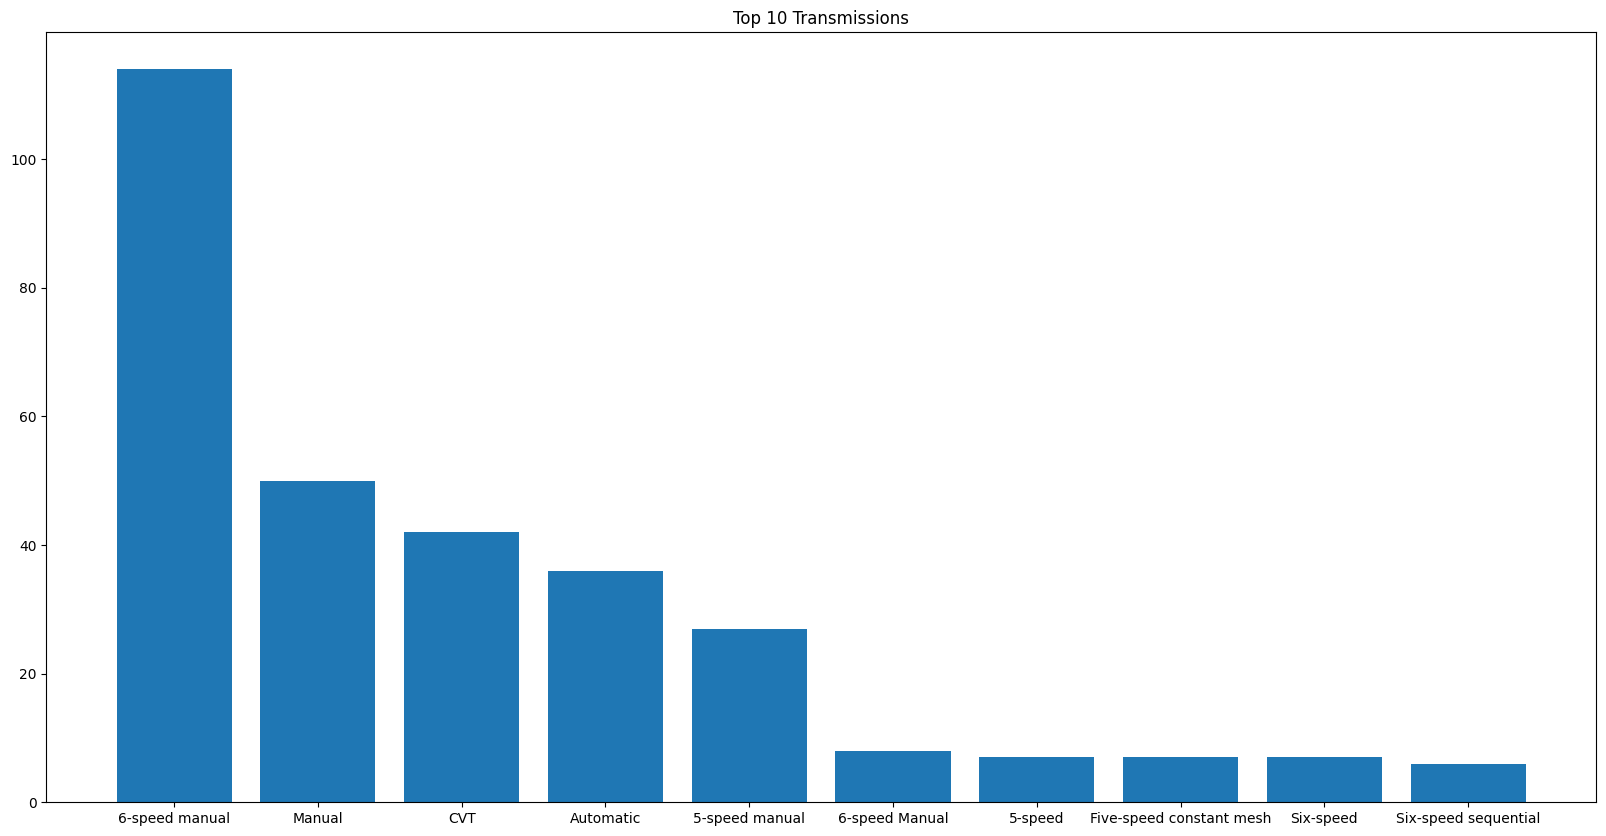

In [106]:
topTransmissions = dict(bikes["transmission_type"].value_counts().sort_values(ascending=False)[:10])
plt.figure(figsize=(20, 10))
plt.bar(list(topTransmissions.keys()), topTransmissions.values())
plt.title("Top 10 Transmissions")
plt.show()